# Clustering the Countries by using Unsupervised Learning for HELP International

Objective:

To categorise the countries using socio-economic and health factors that determine the overall development of the country.

About organization:

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities.

Problem Statement:

HELP International have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. So, CEO has to make decision to choose the countries that are in the direst need of aid. Hence, your Job as a Data scientist is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.

## For this analyses, I will make use of kmeans cluster and hierarchy clustering for visualization

steps;

1. import dataset; clean, preprocess etc
2. EDA
3. k-means clustering (plot elbow curve) to know no of clusters (fit)
4. create a pipeline for feature transformation (use standard scaler) and kmeans
5. make predictions predict
6. save file to csv
4. visualizng clusters using hierachical clustering(to see insightful pattern in the data and make decision:
    a. calculate shrinkage
    b. plot dendrogram

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import os,sys
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_dict= pd.read_csv(r'/Users/wuraolaifeoluwa/Documents/Rasheed data doc /datasets/unsupervised learning on country dataset/data-dictionary.csv.xls')

df_country = pd.read_csv(r'/Users/wuraolaifeoluwa/Documents/Rasheed data doc /datasets/unsupervised learning on country dataset/Country-data.csv.xls')

In [3]:
df = df_country.copy()

In [4]:
df.shape, df_dict.shape

((167, 10), (10, 2))

In [5]:
df_dict.head()

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...


In [6]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [7]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [8]:
df.isnull()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
162,False,False,False,False,False,False,False,False,False,False
163,False,False,False,False,False,False,False,False,False,False
164,False,False,False,False,False,False,False,False,False,False
165,False,False,False,False,False,False,False,False,False,False


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [10]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [11]:
df_dict.isnull().sum()

Column Name    0
Description    0
dtype: int64

In [12]:
# check for unique country values present in the data
df['country'].nunique()

167

In [13]:
# drop country because it wont be needed for unsupervised learning
data = df.drop(['country'], axis=1)

<AxesSubplot:>

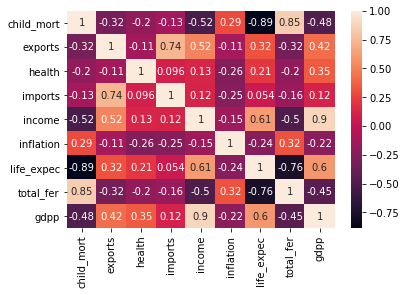

In [17]:
#correlation
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot =True)

from the corroplot we denote; 

1. income, gdpp, child_mortality, total_fertility, imports, exports have highly positively correlated. 
2. life_expectancy and child_mortality have high negative correlated


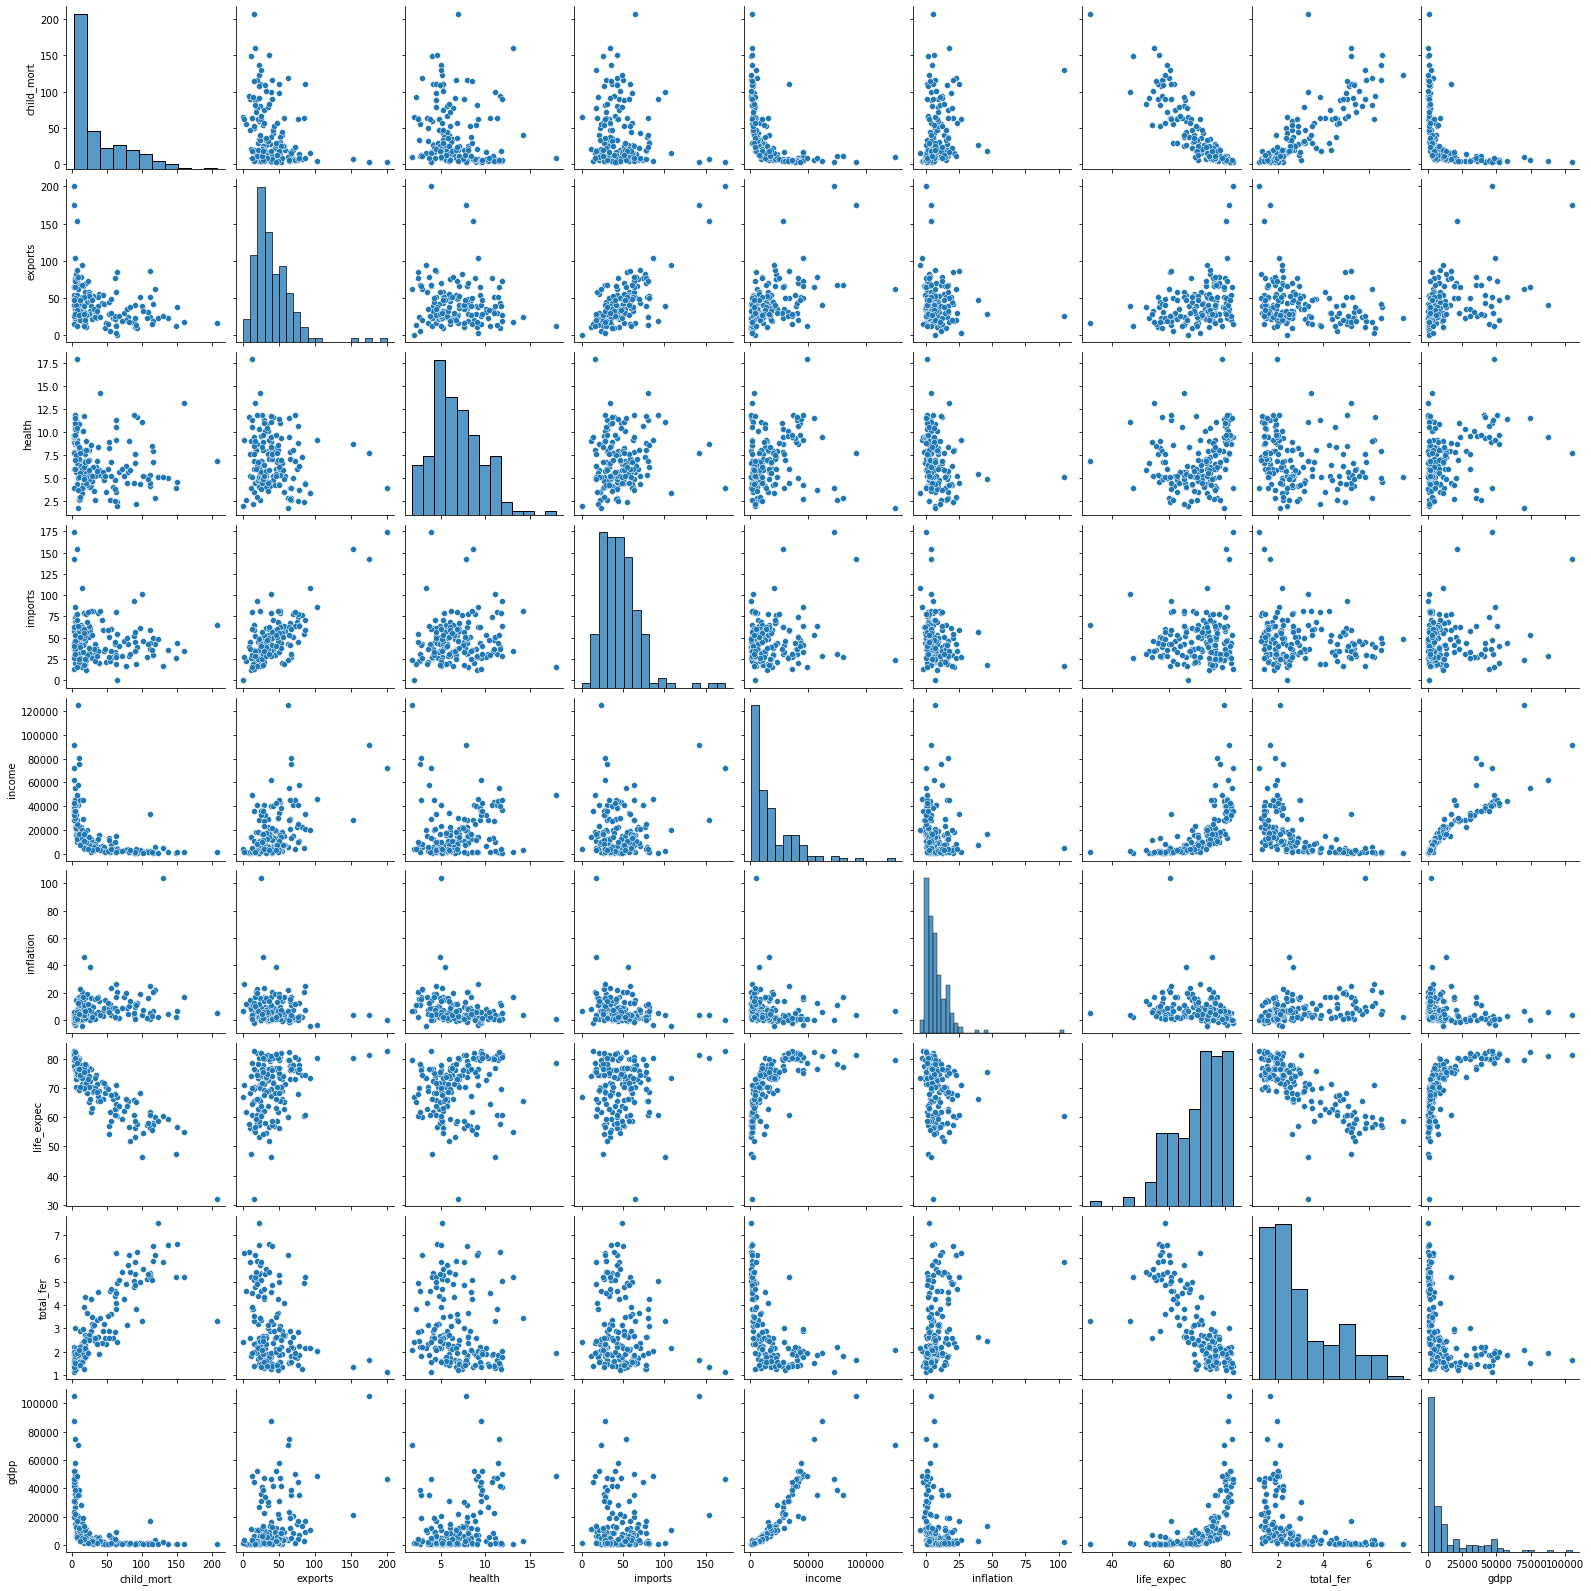

In [18]:
sns.pairplot(data)

# kmeans clustering

K-means Clustering is the most popular unsupervised machine learning algorithm.It is a centroid-based or distance-based algorithm.The woking of the alorithms is as follows:

First we initialize k points called means randomly
Then we categorize each item to its closest mean and we update the mean's coordinates,which are the averages of the items categorized in the mean so far
We repeat the process for a given number of iteartions and at the end,we have our clusters
To decide how many number of clusters consider we are going to use a most popular elbow method

In [20]:
#import neccesary 
from sklearn.cluster import KMeans

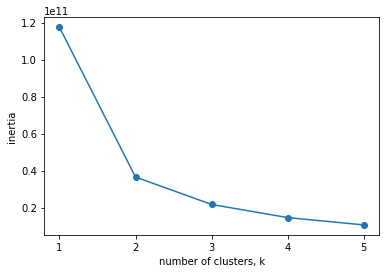

In [21]:
#elbow method

ks = range(1, 6)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    
    # Fit model to data
    model.fit(data)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


we can see the elbow curve at 3 so therefore we can pick 3 as our number of clusters (n_clusters)

# Scaling data (preprocessing)
our data is not scaled because some values are bigger than the others, so we have to perform scaling on our data so as to get a better performance. we are going to use scikit learn library STANDARDSCALAR

Scaling data is necessary just for the algorithms which is based on the distance like K-means clustering and Hierarchical clustering

In [22]:
#import neccesary 
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [23]:
# Create scaler
scaler = StandardScaler()

# Create KMeans 
kmeans = KMeans(n_clusters=3)

# Create pipeline
pipeline = KMeans(n_clusters=3)
make_pipeline(scaler,kmeans)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=3))])

In [24]:
pipeline.fit(data)

KMeans(n_clusters=3)

# Prediction

In [31]:
kmeans_cluster = pipeline.predict(data)

In [32]:
pd.Series(pipeline.labels_).value_counts()

1    128
2     32
0      7
dtype: int64

In [33]:
preds = pipeline.labels_
pipeline_df = pd.DataFrame(df)
pipeline_df['kMeans_clusters'] = preds
pipeline_df.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kMeans_clusters
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,1
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,1
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,1
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,2
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,2
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,1


In [34]:
pipeline_df.to_csv('kmeans_result.csv',index=False)

# Visualizng clusters using hierachical clustering